In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
#Scaling and Splitting
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

/kaggle/input/trailer-prices/trailerdata1.csv
/kaggle/input/trailer-prices/trailerdata2.csv


# About this notebook
This notebook aims to predict the price of a product (trailer) for an early stage start-up. The data has been anonymized. Due to the web infrastructure of other manufacturers of similar trailers, the data was collected by hand. This project is still on-going and updated regularly. 

## Current Challenges
Currently the challenge is to deal with the small amount of data. There are unfortunately not many data points availbale in general, but more data is still being collected. More features will be added soon :) 

In [2]:
#The trailer price data is saved in a csv file and must first be loaded
data = pd.read_csv('/kaggle/input/trailer-prices/trailerdata2.csv', sep=';')
data.head(5)

,total dry weight,length,exterior width,exterior height,interior height,price
0,1660.0,198.0,102.0,84.0,54.0,14879.0
1,2260.0,194.0,102.0,108.0,74.0,18489.0
2,1320.0,144.0,102.0,90.0,54.0,12500.0
3,1320.0,144.0,102.0,90.0,54.0,14997.0
4,1930.0,185.0,102.0,105.0,73.0,15965.0


In [3]:
#inspect the data types of each column
#for modeling everything needs to be and int or float
data.dtypes

total dry weight    float64
length              float64
exterior width      float64
exterior height     float64
interior height     float64
price               float64
dtype: object

In [4]:
#checking for missing values
#missing values must be dealt with for ML modeling
data.isna().sum()

total dry weight    11
length              11
exterior width      11
exterior height     16
interior height     16
price               11
dtype: int64

For modeling all rows and columns must contain data to be considered "clean". There are numerous empty rows which will be dealt with in various ways coming up.

In [5]:
data

,total dry weight,length,exterior width,exterior height,interior height,price
0,1660.0,198.0,102.0,84.0,54.0,14879.0
1,2260.0,194.0,102.0,108.0,74.0,18489.0
2,1320.0,144.0,102.0,90.0,54.0,12500.0
3,1320.0,144.0,102.0,90.0,54.0,14997.0
4,1930.0,185.0,102.0,105.0,73.0,15965.0
...,...,...,...,...,...,...
100,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#everything after is blank rows
data2=data.drop(data.index[94:])
#53 is the target
data2=data2.drop(data.index[53:54])
#an outlier with a price of 90k
data2=data2.drop(data.index[83:84])

In [7]:
data2.tail(15)

,total dry weight,length,exterior width,exterior height,interior height,price
78,1350.0,165.0,80.0,65.25,44.5,14750.0
79,1350.0,165.0,80.0,68.75,44.5,16250.0
80,1350.0,165.0,60.0,68.75,44.5,17250.0
81,1750.0,200.0,80.0,69.00,44.5,19950.0
82,2200.0,110.0,60.0,48.00,45.0,38990.0
84,640.0,140.0,76.0,62.00,38.0,9950.0
85,1200.0,157.0,72.0,64.00,42.0,30590.0
86,1025.0,149.0,83.0,72.00,45.0,13174.0
87,1115.0,165.0,83.0,72.00,45.0,14350.0
88,1450.0,165.0,92.0,95.00,66.0,20230.0


In [8]:
data2.isna().sum()

total dry weight    0
length              0
exterior width      0
exterior height     5
interior height     5
price               0
dtype: int64

In [9]:
data2.shape

(92, 6)

In [10]:
#data2 = data1.drop(['model', 'year', 'sleeps', 'aluminum siding (inch)', 'A/C', 'msrp', 'interior height'], axis=1)

In [11]:
#this column will be renamed to get rid of the space
data2 = data2.rename(columns={"exterior height": "eheight", "total dry weight": "tdweight", "interior height":"intheight", "exterior width":"ewidth"})

~~There are still 3 missing values, but it is missing because these trailers are small than all the others and actually don't have an interior to have an interior height. Therefore it makes the most sense to fill them all in with 0, as they must contain some number for modeling.~~
These were edited in the file

In [12]:
#impute null values 
data2['intheight'] = data2['intheight'].fillna(0)
data2['eheight'] = data2['eheight'].fillna(data2['eheight'].mean())
data2['ewidth'] = data2['ewidth'].fillna(data2['ewidth'].mean())

In [13]:
data2

,tdweight,length,ewidth,eheight,intheight,price
0,1660.0,198.0,102.0,84.0,54.0,14879.0
1,2260.0,194.0,102.0,108.0,74.0,18489.0
2,1320.0,144.0,102.0,90.0,54.0,12500.0
3,1320.0,144.0,102.0,90.0,54.0,14997.0
4,1930.0,185.0,102.0,105.0,73.0,15965.0
...,...,...,...,...,...,...
89,2475.0,216.0,102.0,102.0,83.0,28056.0
90,3000.0,201.0,84.0,92.0,59.0,38999.0
91,1500.0,168.0,80.0,66.0,43.5,18849.0
92,1500.0,168.0,80.0,72.0,43.5,19899.0


In [14]:
data2.isna().sum()

tdweight     0
length       0
ewidth       0
eheight      0
intheight    0
price        0
dtype: int64

In [15]:
data2.dtypes

tdweight     float64
length       float64
ewidth       float64
eheight      float64
intheight    float64
price        float64
dtype: object

In [16]:
#data2['tdweight'] = data2['tdweight'].astype(float)

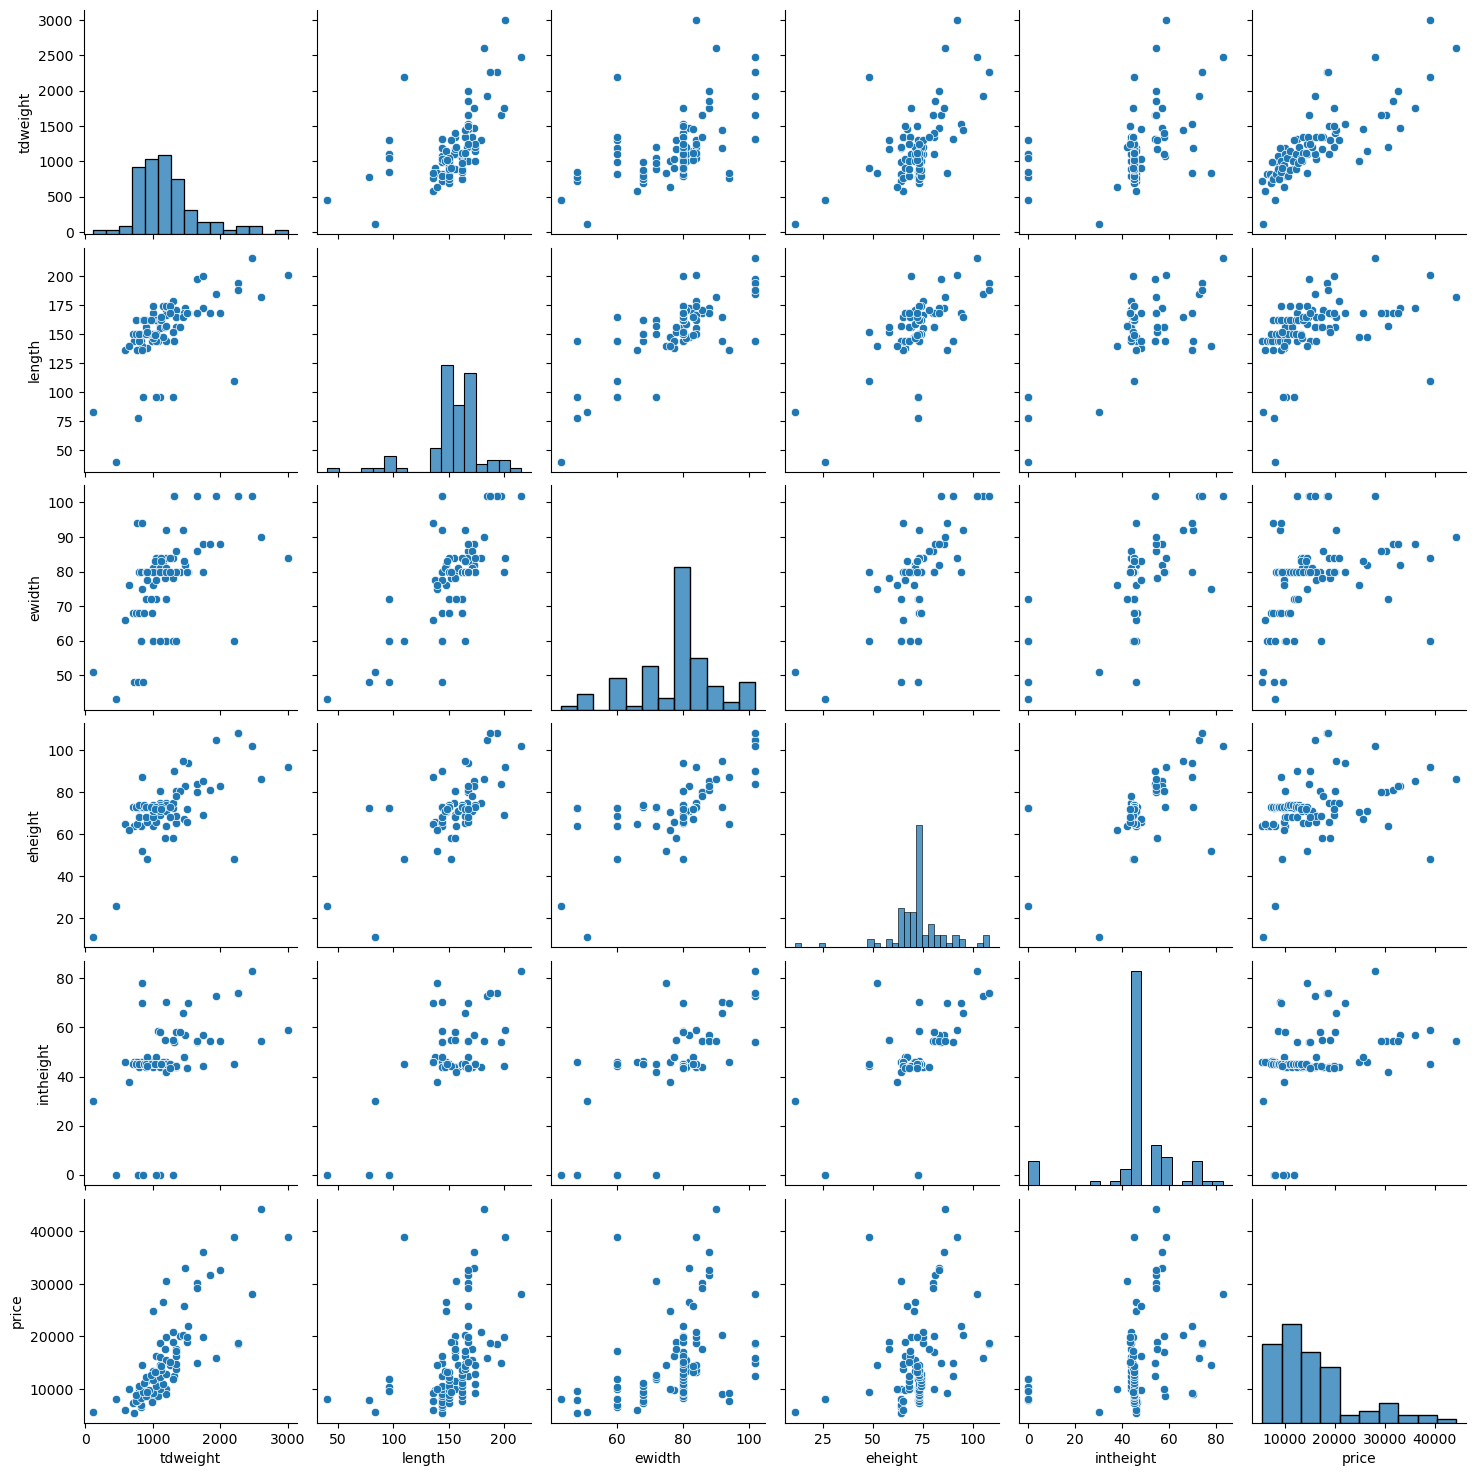

In [17]:
sns.pairplot(data2)

Of all the variables, total dry weight appears to be the most correlated with the price. Let's look at it a bit more closely. 

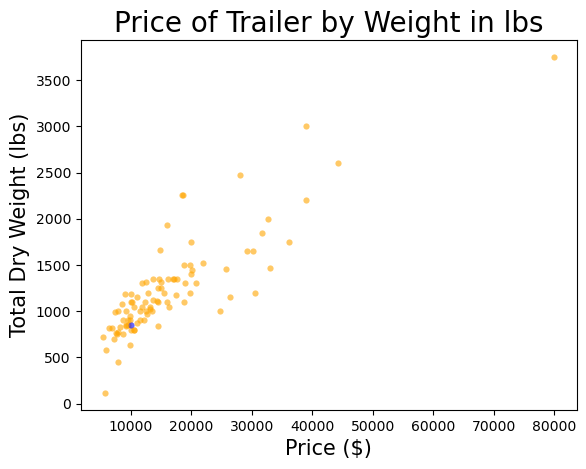

In [18]:
x=data['price']
y= data['total dry weight']

col = []
  
for i in range(0, len(x)):
    if x[i]==9995:
        col.append('blue')  
    else:
        col.append('orange') 
  
for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 20,
                linewidth = 0, alpha=0.6)
    plt.title("Price of Trailer by Weight in lbs", fontsize=20)
    plt.ylabel("Total Dry Weight (lbs)", fontsize=15)
    plt.xlabel("Price ($)", fontsize=15)
      
plt.show()

In [19]:
corr=data2.corr()
corr

,tdweight,length,ewidth,eheight,intheight,price
tdweight,1.000000,0.591934,0.543366,0.613528,0.446133,0.798679
length,0.591934,1.000000,0.683093,0.604026,0.716880,0.412952
ewidth,0.543366,0.683093,1.000000,0.664586,0.674027,0.365495
eheight,0.613528,0.604026,0.664586,1.000000,0.484283,0.324960
intheight,0.446133,0.716880,0.674027,0.484283,1.000000,0.318688
price,0.798679,0.412952,0.365495,0.324960,0.318688,1.000000


<AxesSubplot:>

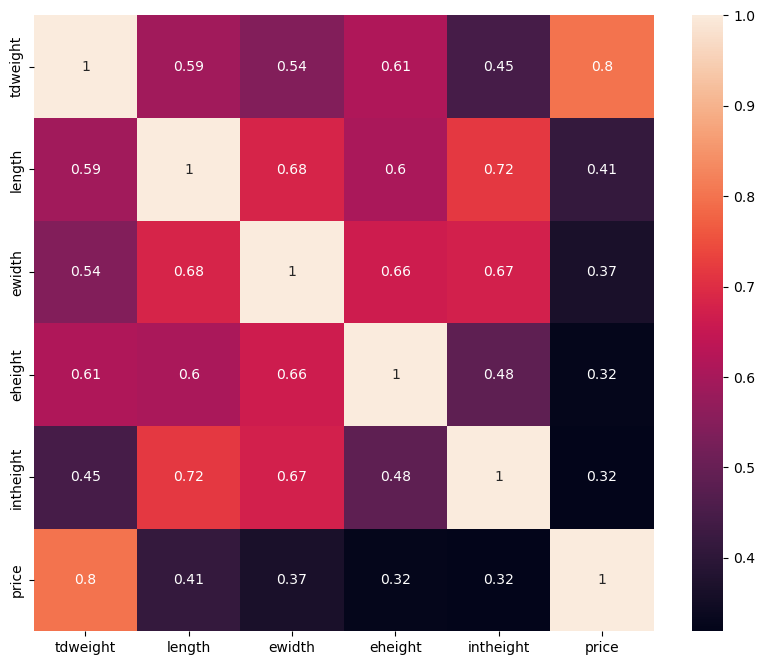

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

# Machine Learning Modeling
The data is now clean and we can move forward with creating some machine learning models. Once we settle on the best model it can be used to predict the target price of the trailer in question.

In [21]:
#here the data is split up into X,y where X contains everything but price and y contains what we want to predict (price)
#price is what we want to predict
X = data2.drop(['price'],axis=1)
y=data2['price']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [23]:
#scaling the data
#this usually helps with modeling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#function which runs different ML models and prints R^2, MAE and RMSE
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

Now the data is all cleaned up and ready for creating some machine learning models. A funtion has been written to run various models and output metrics 

In [25]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.7991090804350429
MAE : 2873.507318134626
RMSE: 3965.873144566301


In [26]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.3753453720294496
MAE : 4614.678571428572
RMSE: 6993.2434305243105


In [27]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.28894017428510144
MAE : 4898.464281721965
RMSE: 7461.25247713512


In [28]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  0.7472725353385832
MAE : 2984.3913531089916
RMSE: 4448.205936314322


In [29]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.7939948730170724
MAE : 2906.116459518383
RMSE: 4016.0367619227927


In [30]:
model_6 = LassoLars(alpha=.1)
run_experiment(model_6)

R^2 :  0.799215569306703
MAE : 2872.2522051560795
RMSE: 3964.8218841648522


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [31]:
model_7 = BayesianRidge()
run_experiment(model_7)

R^2 :  0.7737451139091855
MAE : 3023.05067299995
RMSE: 4208.79379442033


In [32]:
model_8 = SGDRegressor(max_iter=1000, tol=1e-3)
run_experiment(model_8)

R^2 :  0.7942997644104152
MAE : 2904.596435947659
RMSE: 4013.063757193266


In [33]:
model_9 = SVR(epsilon=0.2)
run_experiment(model_9)

R^2 :  -0.27667679074047435
MAE : 6569.762571368822
RMSE: 9997.678035867588


In [34]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

R^2 :  0.7179004597233365
MAE : 3374.869178096708
RMSE: 4699.5887365206645


At first the Random Forest model was preforming the best, but now it is changing every time new data is added, so more comments will be made later.

## Hyperparameter Tuning
Started this when the Random Forest was working better than other models by far, but now it's clear need to wait until the dataset is more complete.

In [35]:
#rfc=RandomForestRegressor(random_state=1)

In [36]:
#param_grid = { 
#    'n_estimators': [100, 500, 1000, 5000],
#    'max_features': ['auto', 'sqrt', 'log2'],
    #to save time in updating the notebook, max_depth is also left out
#    'max_depth' : [5, 10, 15],
#    'min_samples_leaf' : [1,2,3,5],
    #'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
#}


In [37]:
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train_scaled, y_train)

In [38]:
#print the best parameters determined in GridSearchCV
#CV_rfc.best_params_

In [39]:
#run a final model using the optimal parameters
#final_model = RandomForestRegressor(n_estimators=5000, max_features='sqrt', max_depth=10, min_samples_leaf=1, random_state=1)
#run_experiment(final_model)

# Making a prediction for the target 

In [40]:
#select the row of the target
new_input = data.iloc[53:54]
new_input

,total dry weight,length,exterior width,exterior height,interior height,price
53,850.0,144.0,93.0,72.0,47.0,9995.0


In [41]:
#drop the variable to be predicted
new_input=new_input.drop(['price'],axis=1)
new_input

,total dry weight,length,exterior width,exterior height,interior height
53,850.0,144.0,93.0,72.0,47.0


In [42]:
#scale the new input
new_input_scaled = scaler.fit_transform(new_input)

In [43]:
#gives prediction in USD
new_output = model_9.predict(new_input_scaled)
new_output

array([12411.57711207])

# Notes on the metrics used
✔️ Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂𝑖|
1
n
∑
i
=
1
n
|
y
i
−
y
^
i
|
 

 
Mean Squared Error (MSE) is the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2‾‾‾‾‾‾‾‾‾‾‾‾‾‾⎷
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
📌 Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm?scriptVersionId=117768677&cellId=36

<iframe src="https://www.kaggle.com/embed/faressayah/practical-introduction-to-10-regression-algorithm?cellIds=36&kernelSessionId=117768677" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Practical Introduction to 10 Regression Algorithm"></iframe>